# Public Health Data Project  


In [3]:
#Three libraries to bring at the onset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline


In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
import plotly.graph_objects as go

In [8]:
# Importing the data with the question mark transformed as missing values

missing_values = ("?")

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)


C:\Users\charl\AppData\Local\Temp\ipykernel_19920\3846064648.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)


In [9]:
#Reviewing the columns

df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
df.head(5)

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [120]:
# the summary of measures as they're.

df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses     cases  
count     101766.000000     101766.000000     101766.000000  101766.0  
mean           0.197836          0.635566          7.422607       1.0  
std            0.930472          1.262863          1.933600       0.0  
min            0.000000          0.000000          1.000000       1.0  
25%            0.000000          0.000000          6.000000       1.0  
50%            0.000000          0.000000          8.000000       1.0  
75%            0.000000          1.000000          9.000000       1.0  
max           76.000000         21.000000         16.000000       1.0

In [11]:
# I wanted to create the count of encourter_id as a numerical value in a new column called 'Cases'

df['cases'] = 1

In [12]:
df.head(5)

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... insulin glyburide-metformin  glipizide-metformin  \
0                 1  ...      No                  No                   No   
1                 3  ...      Up                  No                   No   
2                 2  ...      No                  No                   No   
3                 2  ...      Up                  No                   No   
4                 1  ...  Steady                  No                   No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed readmitted cases  
0      No           No         NO     1  
1      Ch          Yes        >30     1  
2      No          Yes         NO     1  
3      Ch          Yes         NO     1  
4      Ch          Yes         NO     1  

[5 rows x 51 columns]

In [13]:
df['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14],
      dtype=int64)

In [15]:
#VERY IMPORTANT: I wanted to categorized the time in hospital as a simplified dimension called "time_in_hospital categorized."

df['time_in_hospital_categorized'] = \
  df['time_in_hospital'].apply(lambda x:\
                               '1 day' if x==1 else (\
                                'More than a day but less than a week' if 2<x<7 else (\
                                'More than a week but less than two' if 7<x<14 else 'Two weeks')))

In [17]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [74]:
#ANOTHER IMPORTANT STEP: I wanted to also categorize the age of each patient in the following buckets:


def condition(x):
    if x=="[0-10)" or x== "[10-20)":
        return "Under 20"
    elif x=="[20-30)" or x=="[30-40)":
        return "Between 20 & 40"
    elif x=="[40-50)" or x=="[50-60)":
        return "Between 40 & 60"
    elif x=="[60-70)" or x=="[70-80)":
        return "Between 60 & 80"
    else:
        return "Over 80"


    

In [76]:
# Then I added a new category called "age category" to execute the "condition" object.

df['age category'] = df['age'].apply(condition)


In [77]:
df.head(5)

encounter_id  patient_nbr             race  gender      age         weight  \
0       2278392      8222157        Caucasian  Female   [0-10)  Not available   
1        149190     55629189        Caucasian  Female  [10-20)  Not available   
2         64410     86047875  AfricanAmerican  Female  [20-30)  Not available   
3        500364     82442376        Caucasian    Male  [30-40)  Not available   
4         16680     42519267        Caucasian    Male  [40-50)  Not available   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... metformin-pioglitazone change  diabetesMed  \
0                 1  ...                     No     No           No   
1                 3  ...                     No     Ch          Yes   
2                 2  ...                     No     No          Yes   
3                 2  ...                     No     Ch          Yes   
4                 1  ...                     No     Ch          Yes   

   readmitted  cases          time_in_hospital_categorized     age category  \
0          NO      1                                 1 day         Under 20   
1         >30      1  More than a day but less than a week         Under 20   
2          NO      1                             Two weeks  Between 20 & 40   
3          NO      1                             Two weeks  Between 20 & 40   
4          NO      1                                 1 day  Between 40 & 60   

   payer_type          admission_type    weight_type  
0   Uninsured  Admission type unclear  Not available  
1   Uninsured               Emergency  Not available  
2   Uninsured               Emergency  Not available  
3   Uninsured               Emergency  Not available  
4   Uninsured               Emergency  Not available  

[5 rows x 56 columns]

In [78]:
#I needed to create a new column called Borough by splitting the third character from School DBN. Then, I mapped the character to a more human readable name.


payer_mapping = {
    "CP": "Private Health Insurance",
    "CH": "Private Health Insurance",
    "CM": "Private Health Insurance",
    "DM": "Private Health Insurance",
    "FR": "Private Health Insurance",
    "MP": "Private Health Insurance",
    "OG": "Private Health Insurance",
    "OT": "Private Health Insurance",
    "PO": "Private Health Insurance",
    "SI": "Private Health Insurance",
    "SP": "Self Pay",
    "WC": "Worker's Compensation",
    "MC": "Medicare",
    "MD": "Medicaid",
    "HM": "Private Health Insurance",
    "UN": "Private Health Insurance",
    "NaN": "Uninsured",
    "BC": "Private Health Insurance"
}

df['payer_type'] = df['payer_code'].map(payer_mapping)

In [79]:
# I wanted to change NA to "Uninsured"

df['payer_type'] = df['payer_type'].fillna('Uninsured')

In [80]:
df.head(5)

encounter_id  patient_nbr             race  gender      age         weight  \
0       2278392      8222157        Caucasian  Female   [0-10)  Not available   
1        149190     55629189        Caucasian  Female  [10-20)  Not available   
2         64410     86047875  AfricanAmerican  Female  [20-30)  Not available   
3        500364     82442376        Caucasian    Male  [30-40)  Not available   
4         16680     42519267        Caucasian    Male  [40-50)  Not available   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... metformin-pioglitazone change  diabetesMed  \
0                 1  ...                     No     No           No   
1                 3  ...                     No     Ch          Yes   
2                 2  ...                     No     No          Yes   
3                 2  ...                     No     Ch          Yes   
4                 1  ...                     No     Ch          Yes   

   readmitted  cases          time_in_hospital_categorized     age category  \
0          NO      1                                 1 day         Under 20   
1         >30      1  More than a day but less than a week         Under 20   
2          NO      1                             Two weeks  Between 20 & 40   
3          NO      1                             Two weeks  Between 20 & 40   
4          NO      1                                 1 day  Between 40 & 60   

   payer_type          admission_type    weight_type  
0   Uninsured  Admission type unclear  Not available  
1   Uninsured               Emergency  Not available  
2   Uninsured               Emergency  Not available  
3   Uninsured               Emergency  Not available  
4   Uninsured               Emergency  Not available  

[5 rows x 56 columns]

In [81]:
#I wanted to map the admission_type_id to the corresponding labels, so I created an object to store the mapped codes.
#However, I could not find out 6~8 so I just called them "Admission type unclear"
#I then created a new column "admission_type" and then mapped the labels to the code.

admission_mapping = {
    1: "Emergency",
    2: "Urgent",
    3: "Elective",
    4: "Newborn",
    5: "Trauma Center",
    6: "Admission type unclear",
    7: "Admission type unclear",
    8: "Admission type unclear",
    9: "Information Not Available"
    
}
df['admission_type'] = df['admission_type_id'].map(admission_mapping)

In [82]:
df.head(5)

encounter_id  patient_nbr             race  gender      age         weight  \
0       2278392      8222157        Caucasian  Female   [0-10)  Not available   
1        149190     55629189        Caucasian  Female  [10-20)  Not available   
2         64410     86047875  AfricanAmerican  Female  [20-30)  Not available   
3        500364     82442376        Caucasian    Male  [30-40)  Not available   
4         16680     42519267        Caucasian    Male  [40-50)  Not available   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... metformin-pioglitazone change  diabetesMed  \
0                 1  ...                     No     No           No   
1                 3  ...                     No     Ch          Yes   
2                 2  ...                     No     No          Yes   
3                 2  ...                     No     Ch          Yes   
4                 1  ...                     No     Ch          Yes   

   readmitted  cases          time_in_hospital_categorized     age category  \
0          NO      1                                 1 day         Under 20   
1         >30      1  More than a day but less than a week         Under 20   
2          NO      1                             Two weeks  Between 20 & 40   
3          NO      1                             Two weeks  Between 20 & 40   
4          NO      1                                 1 day  Between 40 & 60   

   payer_type          admission_type    weight_type  
0   Uninsured  Admission type unclear  Not available  
1   Uninsured               Emergency  Not available  
2   Uninsured               Emergency  Not available  
3   Uninsured               Emergency  Not available  
4   Uninsured               Emergency  Not available  

[5 rows x 56 columns]

In [83]:
#I wanted to make sure that the null values within "weight" were counted as "Not available".

df["weight"].fillna("Not available", inplace = True)


In [84]:
#Now the 'weight' column has a new value: "Not available"

df['weight'].unique()


array(['Not available', '[75-100)', '[50-75)', '[0-25)', '[100-125)',
       '[25-50)', '[125-150)', '[175-200)', '[150-175)', '>200'],
      dtype=object)

In [85]:
#I created a new column called "weight_type" and map the four categories to the weight values. 
#I stored the values in an object called "weight_mapping."

weight_mapping = {
    "[0-25)": "Under 100",
    "[25-150)": "Under 100",
    "[50-75)": "Under 100",
    "[75-100)": "Under 100",
    "[100-125)": "Between 100 & 150",
    "[125-150)": "Between 100 & 150",
    "[150-175)": "Between 150 & 200",
    "[175-200)": "Between 150 & 200",
    ">200": "More than 200",
    "Not available": "Not available"
}

df['weight_type'] = df['weight'].map(weight_mapping)

In [86]:
# I verified the new column values.

df['weight_type'].unique()


array(['Not available', 'Under 100', 'Between 100 & 150', nan,
       'Between 150 & 200', 'More than 200'], dtype=object)


#### I wanted to create a table that aggregates by weight_type, race, age category and payer_type. 
#### I added five measures: total_cases, total_patients, avg_diagnoses, avg_meds and avg_emergency. 
#### I then created an index to make sure I could use this as a table.


In [36]:
df1 = df.groupby(['weight_type','race','age category','payer_type'])\
                      .agg(
                        total_cases = ('encounter_id', 'count'),
                        total_patients = ('patient_nbr', 'nunique'),
                        avg_diagnoses = ('number_diagnoses', 'mean'),
                        avg_meds =('num_medications', 'mean'),
                        avg_emergency = ('number_emergency','mean') 
                          )

In [37]:
df1=df1.reset_index() # Must add this statement to create an index after aggregation

In [90]:
df1

weight_type             race     age category  \
0    Between 100 & 150  AfricanAmerican  Between 20 & 40   
1    Between 100 & 150  AfricanAmerican  Between 20 & 40   
2    Between 100 & 150  AfricanAmerican  Between 40 & 60   
3    Between 100 & 150  AfricanAmerican  Between 40 & 60   
4    Between 100 & 150  AfricanAmerican  Between 40 & 60   
..                 ...              ...              ...   
211          Under 100            Other  Between 60 & 80   
212          Under 100            Other  Between 60 & 80   
213          Under 100            Other  Between 60 & 80   
214          Under 100            Other          Over 80   
215          Under 100            Other         Under 20   

                   payer_type  total_cases  total_patients  avg_diagnoses  \
0                    Medicaid            1               1       6.000000   
1    Private Health Insurance            2               2       8.500000   
2                    Medicare            3               3       9.000000   
3    Private Health Insurance           12              12       8.583333   
4                   Uninsured            3               3       6.666667   
..                        ...          ...             ...            ...   
211                  Medicare            3               2       9.000000   
212  Private Health Insurance            6               5       8.833333   
213                 Uninsured            5               5       5.800000   
214                 Uninsured            1               1       6.000000   
215  Private Health Insurance            1               1       3.000000   

      avg_meds  avg_emergency  
0     4.000000       0.000000  
1     9.000000       1.000000  
2    22.666667       0.000000  
3    21.750000       1.500000  
4     9.666667       0.000000  
..         ...            ...  
211  13.666667       0.000000  
212  16.833333       0.666667  
213  20.400000       0.000000  
214   3.000000       0.000000  
215   2.000000       0.000000  

[216 rows x 9 columns]

In [45]:
df3 = df.groupby(['patient_nbr','race','age','gender','payer_type'])\
                      .agg(
                        total_cases = ('encounter_id', 'count'),
                        total_time_in_hospital = ('time_in_hospital', 'sum'),
                        avg_diagnoses = ('number_diagnoses', 'mean'),
                        avg_meds =('num_medications', 'mean'),
                        avg_emergency = ('number_emergency','mean')
                          )

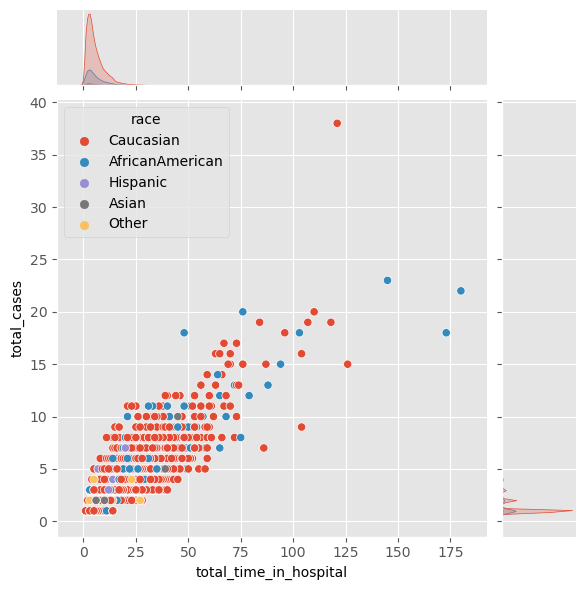

In [47]:
sns.jointplot(x='total_time_in_hospital', y='total_cases', hue="race" , data=df3)

There seems to be a linear relationship between the total time spent in hospital by race. African Americans tend to spend more time hospitalized than other races. In fact, their average time spent is 4.5 days, the highest among all other races. 

#### I tried to create an aggregation by race with the following measures to see if there's any insight. 

In [95]:
df_race = df.groupby(['race'])\
                      .agg(
                        total_cases = ('encounter_id', 'count'),
                        total_patients = ('patient_nbr', 'nunique'),
                        avg_diagnoses = ('number_diagnoses', 'mean'),
                        median_diagnoses = ('number_diagnoses', 'median'),
                        
                        avg_meds =('num_medications', 'mean'),
                        median_meds =('num_medications', 'median'),
                        
                        avg_emergency = ('number_emergency','mean'),
                        median_emergency = ('number_emergency','median'),
                        avg_time_in_hospital = ('time_in_hospital', 'mean'),
                        median_in_hospital = ('time_in_hospital', 'median')
                        )


In [129]:
df_race=df_race.reset_index() # Must add this statement to create an index after aggregation

In [133]:
df_race.head(5)

race  total_cases  total_patients  avg_diagnoses  \
0  AfricanAmerican        19210           12932       7.108381   
1            Asian          641             517       7.049922   
2        Caucasian        76099           53601       7.544790   
3         Hispanic         2037            1534       6.924399   
4            Other         1506            1209       7.186587   

   median_diagnoses   avg_meds  median_meds  avg_emergency  median_emergency  \
0               8.0  15.368922         14.0       0.261010               0.0   
1               8.0  13.291732         12.0       0.093604               0.0   
2               9.0  16.285733         15.0       0.185679               0.0   
3               7.0  14.030437         13.0       0.228277               0.0   
4               8.0  15.185923         14.0       0.241036               0.0   

   avg_time_in_hospital  median_in_hospital  
0              4.507860                 4.0  
1              3.995320                 3.0  
2              4.385721                 4.0  
3              4.059892                 3.0  
4              4.273572                 3.0

##### I tried to create a combo chart showing the relationship between the average emergency visits and average time in the hospital by race. 

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

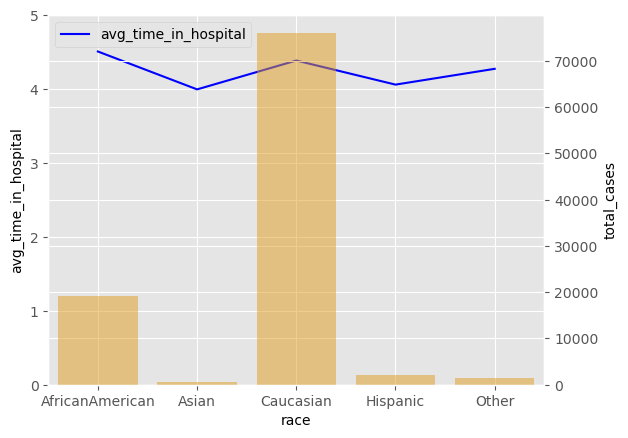

In [134]:
# plot line graph on axis #1
ax1 = sns.lineplot(
    x='race', 
    y='avg_time_in_hospital', 
    data=df_race, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('avg_time_in_hospital')
ax1.set_ylim(0, 5)
ax1.legend(['avg_time_in_hospital'], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.barplot(
    x='race', 
    y='total_cases', 
    data=df_race, 
    color='orange', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(b=False) # turn off grid #2
ax2.set_ylabel('total_cases')
ax2.set_ylim(0, 70000)
ax2.legend(['total_cases'], loc="upper right")
plt.show()

### I created a table for patients with the patient_number as an index. 

In [135]:
df_patients = df.groupby(['patient_nbr', 'race', 'age', 'weight','payer_type', 'readmitted'])\
                      .agg(
                        total_cases = ('encounter_id', 'count'),
                        avg_diagnoses = ('number_diagnoses', 'mean'), 
                        avg_meds =('num_medications', 'mean'),
                        total_emergency = ('number_emergency','sum'),
                        total_time_in_hospital = ('time_in_hospital', 'sum'),
                        avg_lab_procedures = ('num_lab_procedures','mean'),
                        avg_procedures = ('num_procedures','mean'),
                        avg_outpatients = ('number_outpatient','mean'),
                        avg_inpatients = ('number_inpatient', 'mean')
                        )


In [136]:
df_patients=df_patients.reset_index() # Must add this statement to create an index after aggregation

In [137]:
df_patients.head(5)

patient_nbr       race      age         weight payer_type readmitted  \
0          135  Caucasian  [50-60)  Not available  Uninsured        <30   
1          135  Caucasian  [50-60)  Not available  Uninsured        >30   
2          378  Caucasian  [50-60)  Not available  Uninsured         NO   
3          729  Caucasian  [80-90)  Not available   Medicare         NO   
4          774  Caucasian  [80-90)  Not available  Uninsured         NO   

   total_cases  avg_diagnoses  avg_meds  total_emergency  \
0            1            8.0      33.0                0   
1            1            5.0      14.0                0   
2            1            3.0      11.0                0   
3            1            9.0      23.0                0   
4            1            9.0      20.0                0   

   total_time_in_hospital  avg_lab_procedures  avg_procedures  \
0                       8                77.0             6.0   
1                       3                31.0             1.0   
2                       2                49.0             1.0   
3                       4                68.0             2.0   
4                       3                46.0             0.0   

   avg_outpatients  avg_inpatients  
0              0.0             0.0  
1              0.0             1.0  
2              0.0             0.0  
3              0.0             0.0  
4              0.0             0.0

In [142]:
#color = 'weight_type',  size_max=60

fig = px.scatter(df_patients, y='avg_diagnoses', x = 'total_emergency', color='payer_type', size='total_time_in_hospital')
                 #hover_name = 'readmitted')

fig.show()

### The below are some other data exploration that I'd tried to do, but didn't have time.

In [69]:
df_blk = len(df[(df["race"]=="AfricanAmerican") & 
         (df["readmitted"]=='>30')])

In [70]:
df_blk

6634

In [71]:
df_wht = len(df[(df["race"]=="Caucasian") & 
         (df["readmitted"]=='>30')])

In [72]:
df_wht

27124

In [ ]:
df.groupby(['race'],['readmitted'])['encounter_id'].count()

In [40]:
df2 = df1.loc[(df1['race']=='AfricanAmerican')]

In [41]:
df2=df2.reset_index() # Must add this statement to create an index after aggregation

In [48]:
df2.head(5)

index        weight_type             race     age category  \
0      0  Between 100 & 150  AfricanAmerican  Between 20 & 40   
1      1  Between 100 & 150  AfricanAmerican  Between 20 & 40   
2      2  Between 100 & 150  AfricanAmerican  Between 40 & 60   
3      3  Between 100 & 150  AfricanAmerican  Between 40 & 60   
4      4  Between 100 & 150  AfricanAmerican  Between 40 & 60   

                 payer_type  total_cases  total_patients  avg_diagnoses  \
0                  Medicaid            1               1       6.000000   
1  Private Health Insurance            2               2       8.500000   
2                  Medicare            3               3       9.000000   
3  Private Health Insurance           12              12       8.583333   
4                 Uninsured            3               3       6.666667   

    avg_meds  avg_emergency  
0   4.000000            0.0  
1   9.000000            1.0  
2  22.666667            0.0  
3  21.750000            1.5  
4   9.666667            0.0

In [143]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
#How to aggregate the specific value in a column and then output in as  count.

# I want to understand by age category readmission

In [ ]:
df['age category']

In [144]:
df.head(5)

encounter_id  patient_nbr             race  gender      age         weight  \
0       2278392      8222157        Caucasian  Female   [0-10)  Not available   
1        149190     55629189        Caucasian  Female  [10-20)  Not available   
2         64410     86047875  AfricanAmerican  Female  [20-30)  Not available   
3        500364     82442376        Caucasian    Male  [30-40)  Not available   
4         16680     42519267        Caucasian    Male  [40-50)  Not available   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... metformin-pioglitazone change  diabetesMed  \
0                 1  ...                     No     No           No   
1                 3  ...                     No     Ch          Yes   
2                 2  ...                     No     No          Yes   
3                 2  ...                     No     Ch          Yes   
4                 1  ...                     No     Ch          Yes   

   readmitted  cases          time_in_hospital_categorized     age category  \
0          NO      1                                 1 day         Under 20   
1         >30      1  More than a day but less than a week         Under 20   
2          NO      1                             Two weeks  Between 20 & 40   
3          NO      1                             Two weeks  Between 20 & 40   
4          NO      1                                 1 day  Between 40 & 60   

   payer_type          admission_type    weight_type  
0   Uninsured  Admission type unclear  Not available  
1   Uninsured               Emergency  Not available  
2   Uninsured               Emergency  Not available  
3   Uninsured               Emergency  Not available  
4   Uninsured               Emergency  Not available  

[5 rows x 56 columns]

In [153]:
#picking just encounter_id

df.groupby(['age category','readmitted'])['encounter_id'].count()

age category     readmitted
Between 20 & 40  <30             660
                 >30            1697
                 NO             3075
Between 40 & 60  <30            2695
                 >30            9195
                 NO            15051
Between 60 & 80  <30            5571
                 >30           17372
                 NO            25608
Over 80          <30            2388
                 >30            7031
                 NO            10571
Under 20         <30              43
                 >30             250
                 NO              559
Name: encounter_id, dtype: int64

# VARIABLE NAMES: DESCRIPTION

Encounter ID: Unique identifier of an encounter

Patient number: Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight: Weight in pounds

Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
1 = Emergency
2 = Urgent
3 = Elective
4 = Newborn
5 = Trauma Center
9 = Information Not Available

Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital: Integer number of days between admission and discharge

Payer code: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures: Number of lab tests performed during the encounter

Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications: Number of distinct generic names administered during the encounter

Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses Number of diagnoses entered to the system 0%

Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission
